### **IMPORT MODULES**

In [605]:
# Packages for data manipulation
import numpy as np
import pandas as pd
from collections import Counter

# Packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

**Objective 3 - Question 5: Descriptive Statistics and Visualize the PTS, FG%, 3P% attributes of Forward?**

**SCORING METRICS**

In [606]:
position_mapping = {
    'F': 'Forward',
    'C': 'Center',
    'G': 'Guard',
}

# Players

### **Title 1: Players**

**Objective 3: Analyze player performance by position**

Break down player performance based on their roles and positions:

***Forward (Versatile Scores and Secondary Defenders)***
- **Scoring Metric** includes scoring **PTS** (Points), shooting (**FG%**, **3P%**, **2P%**, **EFG%**, **FT%**) (Field Goal Percentage, Three-Point Percentage, Two-Point Percentage, Effective Field Goal Percentage, Free Throw Percentage).
- **Rebounding Metric** includes **TRB** (Total Rebounds).
- **Secondary Defense** includes shot-blocking **BLK** (Blocks), **STL** (Steals), **AST** (Assists) and **PF** (Personal Fouls).



***Centers (Interior Dominance and Paint Efficiency)***
- **Interior Scoring** includes **PTS** (Points), **FG%** (Field Goal Percentage), **2P%** (Two-Point Percentage), **EFG%** (Effective Field Goal Percentage), **FT%** (Free Throw Percentage).
- **Defensive Metrics** includes **ORB** (Offensive Rebounds), **TRB** (Total Rebounds) **BLK** (Blocks) and **TOV** (Turnovers).


***Guards (Playmakers and Perimeter Scorers)***
- **Playmaking Metrics** includes **AST** (Assists) and **TOV** (Turnovers).
- **Perimeter Scoring** includes **PTS** (Points), **FG%**. (Field Goal Percentage), **3P%** (Three-Point Percentage)
- **Ball handling** includes **STL** (Steals), **FT%** (Free Throw Percentage).


**Role-Specific Metric Analysis**
- Defensive Metrics: REB, STL, BLK to evaluate defensive impact.
- Scoring Metrics: PTS, FG%, 3P% to assess offensive efficiency and scoring ability.
- Playmaking Metrics: AST, FG%, 3P%, FT% to analyze shooting and passing effectiveness.

### **LOAD DATASETS**

In [607]:
nba_stats = pd.read_csv(filepath_or_buffer="final_data/player_stats.csv")

### **CLEAN DATA**

In [608]:
nba_stats.head(10)

,season,team,pos,g,gs,mp,fg,fga,fg%,3p,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,name
0,2020-2021,Miami Heat,PF,61.0,4.0,737.0,124.0,228.0,0.544,0.0,...,73.0,135.0,208.0,29.0,20.0,28.0,43.0,91.0,304.0,Precious Achiuwa
1,2021-2022,Toronto Raptors,C,73.0,28.0,1725.0,265.0,603.0,0.439,56.0,...,146.0,327.0,473.0,82.0,37.0,41.0,84.0,151.0,664.0,Precious Achiuwa
2,2022-2023,Toronto Raptors,C,55.0,12.0,1140.0,196.0,404.0,0.485,29.0,...,100.0,228.0,328.0,50.0,31.0,30.0,59.0,102.0,508.0,Precious Achiuwa
3,2023-2024,Total,PF,74.0,18.0,1624.0,235.0,469.0,0.501,26.0,...,191.0,296.0,487.0,97.0,46.0,68.0,83.0,143.0,565.0,Precious Achiuwa
4,2023-2024,Toronto Raptors,C,25.0,0.0,437.0,78.0,170.0,0.459,13.0,...,50.0,86.0,136.0,44.0,16.0,12.0,29.0,40.0,193.0,Precious Achiuwa
5,2023-2024,New York Knicks,PF,49.0,18.0,1187.0,157.0,299.0,0.525,13.0,...,141.0,210.0,351.0,53.0,30.0,56.0,54.0,103.0,372.0,Precious Achiuwa
6,2024-2025,New York Knicks,PF,10.0,1.0,195.0,21.0,46.0,0.457,3.0,...,24.0,46.0,70.0,13.0,8.0,9.0,10.0,14.0,52.0,Precious Achiuwa
7,2013-2014,Oklahoma City Thunder,C,81.0,20.0,1197.0,93.0,185.0,0.503,0.0,...,142.0,190.0,332.0,43.0,40.0,57.0,71.0,203.0,265.0,Steven Adams
8,2014-2015,Oklahoma City Thunder,C,70.0,67.0,1771.0,217.0,399.0,0.544,0.0,...,199.0,324.0,523.0,66.0,38.0,86.0,99.0,222.0,537.0,Steven Adams
9,2015-2016,Oklahoma City Thunder,C,80.0,80.0,2014.0,261.0,426.0,0.613,0.0,...,219.0,314.0,533.0,62.0,42.0,89.0,84.0,223.0,636.0,Steven Adams


### **GENERAL**

## **Exploring the roles and positions though each season?**

**Objective 3 - Question 1: How many roles and positions though each season?**

In [609]:
season_group = nba_stats.groupby(by=['season', 'pos']).size().reset_index(name='player_count')

pivot_table = season_group.pivot(index='pos', columns='season', values='player_count').fillna(0)
pivot_table

season,2003-2004,2004-2005,2005-2006,2006-2007,2007-2008,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,...,2015-2016,2016-2017,2017-2018,2018-2019,2019-2020,2020-2021,2021-2022,2022-2023,2023-2024,2024-2025
pos,,,,,,,,,,,,,,,,,,,,,
C,0.0,0.0,0.0,0.0,1.0,6.0,5.0,5.0,9.0,10.0,...,28.0,44.0,58.0,64.0,98.0,118.0,117.0,136.0,119.0,94.0
PF,0.0,0.0,0.0,0.0,1.0,2.0,5.0,8.0,7.0,12.0,...,28.0,35.0,43.0,71.0,89.0,106.0,132.0,119.0,153.0,93.0
PG,0.0,0.0,1.0,2.0,3.0,7.0,8.0,14.0,17.0,20.0,...,36.0,45.0,59.0,73.0,77.0,97.0,125.0,111.0,145.0,92.0
SF,0.0,1.0,1.0,2.0,2.0,3.0,4.0,10.0,7.0,14.0,...,33.0,43.0,49.0,71.0,86.0,104.0,129.0,133.0,154.0,91.0
SG,1.0,0.0,0.0,0.0,1.0,2.0,8.0,7.0,8.0,16.0,...,30.0,41.0,55.0,102.0,99.0,131.0,179.0,156.0,157.0,143.0


**Comments**

- C  : Center
- PF : Power Forward
- SF : Small Forward
- PG : Power Guard
- SG : Small Guard

**Objective 3 - Question 3: How to handle the players with 'PF', 'PG', 'SF', 'SG' roles?**

We want to focus on analyzing on three main roles: **Forward**, **Center** and **Guard** so we will change **PF** and **SF** into **F** (Forward) and **PG** and **SG** in **G** (Guard)

In [610]:
nba_stats['pos'] = nba_stats['pos'].str[-1]

nba_stats.head(5)

,season,team,pos,g,gs,mp,fg,fga,fg%,3p,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,name
0,2020-2021,Miami Heat,F,61.0,4.0,737.0,124.0,228.0,0.544,0.0,...,73.0,135.0,208.0,29.0,20.0,28.0,43.0,91.0,304.0,Precious Achiuwa
1,2021-2022,Toronto Raptors,C,73.0,28.0,1725.0,265.0,603.0,0.439,56.0,...,146.0,327.0,473.0,82.0,37.0,41.0,84.0,151.0,664.0,Precious Achiuwa
2,2022-2023,Toronto Raptors,C,55.0,12.0,1140.0,196.0,404.0,0.485,29.0,...,100.0,228.0,328.0,50.0,31.0,30.0,59.0,102.0,508.0,Precious Achiuwa
3,2023-2024,Total,F,74.0,18.0,1624.0,235.0,469.0,0.501,26.0,...,191.0,296.0,487.0,97.0,46.0,68.0,83.0,143.0,565.0,Precious Achiuwa
4,2023-2024,Toronto Raptors,C,25.0,0.0,437.0,78.0,170.0,0.459,13.0,...,50.0,86.0,136.0,44.0,16.0,12.0,29.0,40.0,193.0,Precious Achiuwa


**Objective 3 - Question 4: How many roles and positions over the past five years after handling players's role?**

In [611]:
season_group = nba_stats.groupby(by=['season', 'pos']).size().reset_index(name='player_count')
five_years_season = season_group[season_group['season'].isin(['2024-2025'])]

nba_player_five_years = nba_stats[nba_stats['season'].isin(['2024-2025'])]

pivot_table = five_years_season.pivot(index='pos', columns='season', values='player_count').fillna(0)
pivot_table

season,2024-2025
pos,
C,94
F,184
G,235


**Objective 3 - Question 5: Check and handle records with NaN values in all player metrics.**

**FORWARD**

In [612]:
forward_player = nba_player_five_years[nba_player_five_years['pos'] == 'F']

forward_player[forward_player.isna().any(axis=1)]

,season,team,pos,g,gs,mp,fg,fga,fg%,3p,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,name
746,2024-2025,Denver Nuggets,F,4.0,0.0,34.0,4.0,7.0,0.571,1.0,...,3.0,5.0,8.0,0.0,0.0,1.0,2.0,4.0,9.0,Vlatko Čančar
843,2024-2025,Toronto Raptors,F,3.0,0.0,14.0,1.0,2.0,0.500,0.0,...,4.0,1.0,0.0,0.0,2.0,2.0,2.0,0.0,NaN,Ulrich Chomche
1322,2024-2025,Dallas Mavericks,F,10.0,0.0,24.0,0.0,6.0,0.000,0.0,...,0.0,2.0,2.0,1.0,0.0,1.0,1.0,4.0,0.0,Kessler Edwards
1772,2024-2025,Atlanta Hawks,F,2.0,0.0,11.0,1.0,4.0,0.250,0.0,...,0.0,2.0,2.0,0.0,0.0,0.0,1.0,0.0,2.0,Mouhamed Gueye
2194,2024-2025,Minnesota Timberwolves,F,7.0,0.0,26.0,0.0,2.0,0.000,0.0,...,2.0,0.0,2.0,9.0,0.0,0.0,1.0,5.0,0.0,Joe Ingles
2204,2024-2025,San Antonio Spurs,F,1.0,0.0,7.0,0.0,1.0,0.000,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,Harrison Ingram
2488,2024-2025,Denver Nuggets,F,4.0,0.0,9.0,0.0,2.0,0.000,0.0,...,3.0,0.0,2.0,0.0,1.0,1.0,0.0,0.0,NaN,Spencer Jones
2773,2024-2025,Los Angeles Lakers,F,7.0,0.0,29.0,2.0,6.0,0.333,0.0,...,2.0,0.0,2.0,2.0,1.0,0.0,2.0,1.0,4.0,Maxwell Lewis
2800,2024-2025,Milwaukee Bucks,F,3.0,0.0,6.0,1.0,2.0,0.500,0.0,...,1.0,1.0,2.0,1.0,1.0,0.0,1.0,0.0,2.0,Chris Livingston
3008,2024-2025,New Orleans Pelicans,F,5.0,0.0,39.0,2.0,5.0,0.400,0.0,...,10.0,0.0,3.0,3.0,4.0,4.0,4.0,0.0,NaN,Karlo Matković


In [613]:
numerical_columns = forward_player.select_dtypes(include=['number']).columns

forward_player.loc[:, numerical_columns] = forward_player[numerical_columns].fillna(forward_player[numerical_columns].mean())

forward_player[forward_player.isna().any(axis=1)]

,season,team,pos,g,gs,mp,fg,fga,fg%,3p,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,name


**CENTER**

In [614]:
center_player = nba_player_five_years[nba_player_five_years['pos'] == 'C']

center_player[center_player.isna().any(axis=1)]

,season,team,pos,g,gs,mp,fg,fga,fg%,3p,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,name
17,2024-2025,Houston Rockets,C,18.0,0.0,186.0,17.0,28.0,0.607,0.0,...,28.0,38.0,66.0,19.0,5.0,4.0,21.0,19.0,44.0,Steven Adams
238,2024-2025,San Antonio Spurs,C,20.0,0.0,219.0,43.0,75.0,0.573,0.0,...,32.0,56.0,88.0,9.0,7.0,22.0,15.0,27.0,99.0,Charles Bassey
759,2024-2025,Atlanta Hawks,C,31.0,31.0,712.0,135.0,236.0,0.572,0.0,...,109.0,174.0,283.0,40.0,18.0,32.0,28.0,60.0,301.0,Clint Capela
1157,2024-2025,Charlotte Hornets,C,28.0,4.0,515.0,46.0,75.0,0.613,0.0,...,92.0,107.0,199.0,18.0,17.0,22.0,26.0,50.0,103.0,Moussa Diabaté
1302,2024-2025,Detroit Pistons,C,28.0,28.0,701.0,104.0,150.0,0.693,0.0,...,85.0,173.0,258.0,65.0,15.0,33.0,56.0,88.0,257.0,Jalen Duren
1387,2024-2025,Toronto Raptors,C,16.0,2.0,143.0,26.0,48.0,0.542,0.0,...,21.0,29.0,50.0,18.0,4.0,9.0,14.0,26.0,58.0,Bruno Fernando
1494,2024-2025,Dallas Mavericks,C,30.0,13.0,613.0,150.0,208.0,0.721,0.0,...,75.0,108.0,183.0,38.0,13.0,36.0,29.0,76.0,364.0,Daniel Gafford
1618,2024-2025,Minnesota Timberwolves,C,30.0,30.0,1016.0,118.0,183.0,0.645,0.0,...,96.0,220.0,316.0,52.0,22.0,42.0,46.0,78.0,309.0,Rudy Gobert
1949,2024-2025,Los Angeles Lakers,C,11.0,1.0,192.0,26.0,36.0,0.722,0.0,...,21.0,29.0,50.0,9.0,4.0,9.0,8.0,28.0,70.0,Jaxson Hayes
2248,2024-2025,Indiana Pacers,C,5.0,1.0,84.0,14.0,23.0,0.609,0.0,...,11.0,17.0,28.0,5.0,3.0,8.0,5.0,14.0,35.0,Isaiah Jackson


In [615]:
numerical_columns = center_player.select_dtypes(include=['number']).columns

center_player.loc[:, numerical_columns] = center_player[numerical_columns].fillna(center_player[numerical_columns].mean())

center_player[center_player.isna().any(axis=1)]

,season,team,pos,g,gs,mp,fg,fga,fg%,3p,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,name


**GUARD**

In [616]:
guard_player = nba_player_five_years[nba_player_five_years['pos'] == 'C']

guard_player[guard_player.isna().any(axis=1)]

,season,team,pos,g,gs,mp,fg,fga,fg%,3p,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,name
17,2024-2025,Houston Rockets,C,18.0,0.0,186.0,17.0,28.0,0.607,0.0,...,28.0,38.0,66.0,19.0,5.0,4.0,21.0,19.0,44.0,Steven Adams
238,2024-2025,San Antonio Spurs,C,20.0,0.0,219.0,43.0,75.0,0.573,0.0,...,32.0,56.0,88.0,9.0,7.0,22.0,15.0,27.0,99.0,Charles Bassey
759,2024-2025,Atlanta Hawks,C,31.0,31.0,712.0,135.0,236.0,0.572,0.0,...,109.0,174.0,283.0,40.0,18.0,32.0,28.0,60.0,301.0,Clint Capela
1157,2024-2025,Charlotte Hornets,C,28.0,4.0,515.0,46.0,75.0,0.613,0.0,...,92.0,107.0,199.0,18.0,17.0,22.0,26.0,50.0,103.0,Moussa Diabaté
1302,2024-2025,Detroit Pistons,C,28.0,28.0,701.0,104.0,150.0,0.693,0.0,...,85.0,173.0,258.0,65.0,15.0,33.0,56.0,88.0,257.0,Jalen Duren
1387,2024-2025,Toronto Raptors,C,16.0,2.0,143.0,26.0,48.0,0.542,0.0,...,21.0,29.0,50.0,18.0,4.0,9.0,14.0,26.0,58.0,Bruno Fernando
1494,2024-2025,Dallas Mavericks,C,30.0,13.0,613.0,150.0,208.0,0.721,0.0,...,75.0,108.0,183.0,38.0,13.0,36.0,29.0,76.0,364.0,Daniel Gafford
1618,2024-2025,Minnesota Timberwolves,C,30.0,30.0,1016.0,118.0,183.0,0.645,0.0,...,96.0,220.0,316.0,52.0,22.0,42.0,46.0,78.0,309.0,Rudy Gobert
1949,2024-2025,Los Angeles Lakers,C,11.0,1.0,192.0,26.0,36.0,0.722,0.0,...,21.0,29.0,50.0,9.0,4.0,9.0,8.0,28.0,70.0,Jaxson Hayes
2248,2024-2025,Indiana Pacers,C,5.0,1.0,84.0,14.0,23.0,0.609,0.0,...,11.0,17.0,28.0,5.0,3.0,8.0,5.0,14.0,35.0,Isaiah Jackson


In [617]:
numerical_columns = guard_player.select_dtypes(include=['number']).columns

guard_player.loc[:, numerical_columns] = guard_player[numerical_columns].fillna(guard_player[numerical_columns].mean())

guard_player[guard_player.isna().any(axis=1)]

,season,team,pos,g,gs,mp,fg,fga,fg%,3p,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,name


## **FORWARD ANALYSIS (2024-2025)**

Perform clustering the forward players with the K-Means algorithm

**Objective 3 - Question 1: What is about the METRIC of all forward players?**

In [618]:
forward_metrics = forward_player[['pts', 'fg%', '3p%', '2p%', 'efg%', 'ft%', 'trb', 'blk', 'stl', 'ast', 'pf']]
forward_metrics = forward_metrics.reset_index().drop(columns='index')

forward_metrics

,pts,fg%,3p%,2p%,efg%,ft%,trb,blk,stl,ast,pf
0,52.0,0.457,0.333,0.486,0.489,0.500,70.0,9.0,8.0,13.0,14.0
1,403.0,0.508,0.388,0.605,0.595,0.767,226.0,17.0,28.0,92.0,32.0
2,130.0,0.415,0.357,0.444,0.476,0.650,78.0,12.0,20.0,58.0,28.0
3,785.0,0.613,0.222,0.627,0.617,0.614,278.0,36.0,17.0,144.0,56.0
4,513.0,0.479,0.355,0.580,0.559,0.795,156.0,31.0,47.0,63.0,78.0
...,...,...,...,...,...,...,...,...,...,...,...
179,115.0,0.556,0.395,0.737,0.660,1.000,62.0,4.0,13.0,19.0,31.0
180,211.0,0.388,0.369,0.412,0.489,0.871,95.0,11.0,20.0,48.0,28.0
181,181.0,0.403,0.273,0.495,0.459,0.795,92.0,7.0,20.0,24.0,56.0
182,136.0,0.452,0.333,0.459,0.462,0.667,48.0,7.0,4.0,32.0,18.0


**Objective 3 - Question 2: What is the descriptive statistic of forward players metric?**

In [619]:
forward_metrics.describe()

,pts,fg%,3p%,2p%,efg%,ft%,trb,blk,stl,ast,pf
count,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.00000
mean,200.915730,0.439365,0.566394,0.529697,0.580407,0.909882,79.125000,8.625000,14.005435,36.010870,33.25000
std,182.668348,0.130950,3.078643,0.175256,0.809494,1.688541,68.726596,8.881467,12.305979,40.062654,25.78966
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,37.250000,0.408750,0.273000,0.486750,0.476000,0.680500,14.750000,2.000000,2.000000,4.000000,8.75000
50%,167.500000,0.449000,0.341000,0.529697,0.531000,0.778000,70.500000,5.000000,11.000000,23.500000,31.00000
75%,301.750000,0.500000,0.388500,0.594750,0.582000,0.871000,122.000000,13.000000,23.000000,52.000000,53.25000
max,804.000000,1.000000,42.000000,1.000000,11.000000,23.000000,299.000000,42.000000,47.000000,252.000000,95.00000


**Objective 3 - Question 3: What is the Scaler used to scale the features?**

We use `StandardScaler` for scaling the features to ensure that all features contribute equally to the K-means clustering algorithm process. The `StandardScaler` will standardize them to have a mean of 0 and standard deviation of 1.

We consider this is so crucial and necessary because K-means relies on **Euclidean distance**, which is sensitive to feature magnitudes. In the case without scaling, features with the larger range (**pts** for example) would dominate the distance calculations lead to bias the clusters.

In [620]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(forward_metrics)

scaled_features

array([[-0.81744895,  0.13504031, -0.07601766, ..., -0.48934104,
        -0.57593925, -0.74845981],
       [ 1.1093091 ,  0.52556573, -0.05810391, ...,  1.14031961,
         1.40135242, -0.04860129],
       [-0.3892805 , -0.18656885, -0.06820075, ...,  0.48845535,
         0.55036613, -0.2041254 ],
       ...,
       [-0.1093242 , -0.27845718, -0.09555994, ...,  0.48845535,
        -0.30062016,  0.88454341],
       [-0.35634446,  0.09675351, -0.07601766, ..., -0.81527317,
        -0.10038809, -0.59293569],
       [ 0.36275897, -0.3933176 , -0.08025182, ...,  0.08104019,
         0.52533712,  1.2733537 ]])

**Objective 3 - Question 4: What the method to determine the optimal number of clusters?**

We use two common methods are the Elbow Method and the Silhouette Score to determine the optimal number of clusters for K-means clustering.

### **Why we do that?**

With the Elbow Method, the inertia (or the sum of squared distances from each point to its assigned cluster's centroid) is calculated for a range of cluster numbers. As the number of clusters increases, inertia generally decreases because the clusters become more compact.

=> The optimal number of clusters is typically chosen where the decrease in inertia slows down significantly (it will create a shape looks like 'elbow' in the graph). This point indicates the most efficient number of clusters, where adding more clusters does not provide substantial improvements in the clustering quality.


With Silhouette Score, it evaluates both the cohesion and separation of clusters. A higher silhouette score indicates that the clusters are well-defined and distinct from one another. By calculating the silhouette score for different numbers of clusters, we will know how well-separated the clusters are.

=> The optimal number of clusters is often the one with the highest silhouette score and it suggests that the clusters are not only compact but also well-separated from each other.

**Conclusion**: We choose combining both methods because it provides a reliable approach for determining the optimal number of clusters.

In [621]:
inertia = []
silhouette_scores = []
cluster_range = range(2, 11)


for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_features, kmeans.labels_))

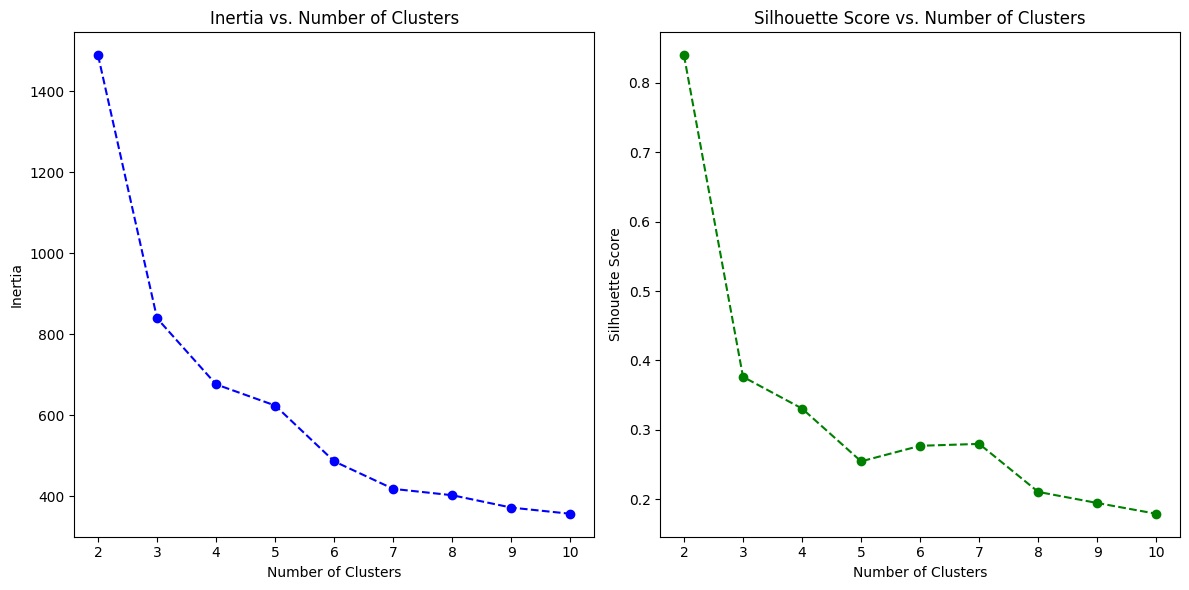

In [622]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(cluster_range, inertia, marker='o', color='b', linestyle='--')
plt.title('Inertia vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

plt.subplot(1, 2, 2)
plt.plot(cluster_range, silhouette_scores, marker='o', color='g', linestyle='--')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

Based on both line chart, Inertia vs Number of Clusters (left) and Silhouette Score vs Number of Clusters (right), we will choose the optimal cluster (k) is **3**.

**Objective 3 - Question 4: Based on the optimal cluster (k), train the K-Means model to cluster the forward players**

In [623]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

forward_metrics['Cluster'] = clusters

In [624]:
cluster_summary = forward_metrics.groupby('Cluster').size()

print(f"Number of players in cluster 0: {cluster_summary[0]}")
print(f"Number of players in cluster 1: {cluster_summary[1]}")
print(f"Number of players in cluster 2: {cluster_summary[2]}")

Number of players in cluster 0: 1
Number of players in cluster 1: 87
Number of players in cluster 2: 96


In [625]:
cluster_mean = forward_metrics.groupby('Cluster').mean()

cluster_mean

,pts,fg%,3p%,2p%,efg%,ft%,trb,blk,stl,ast,pf
Cluster,,,,,,,,,,,
0,0.000000,0.636000,42.000000,0.636000,11.000000,23.000000,21.000000,12.000000,7.000000,10.000000,95.000000
1,348.655172,0.461713,0.353782,0.534356,0.541598,0.771598,136.908046,15.195402,24.436782,65.678161,54.701149
2,69.119733,0.417063,0.327475,0.524366,0.507040,0.805097,27.364583,2.635417,4.625000,9.395833,13.166667


### **Insights**

Because the **Cluster 0** just only have 1 member so we do not analyze it but only focus on analyzing the **Cluster 1** and **Cluster 2**.

### **Cluster 1**

Players in **Cluster 1** are high-impact, well-rounded contributors, playing key roles in both offense and defense. 

**SCORING METRIC**

With an average of 348.66 points, these players are clearly primary scoring options for their teams. Their 46.17% field goal percentage and 35.38% 3-point shooting reflect solid shooting efficiency, meaning they can score both inside and from beyond the arc. This makes them versatile offensive players capable of contributing in multiple ways.

**REBOUNDING METRIC**

Beyond scoring, **Cluster 1** players also have a strong defensive presence. They average 136.91 rebounds, which indicates that they contribute significantly to securing possessions for their teams, both offensively and defensively.

**SECONDARY DEFENSE**

Additionally, their impressive averages in blocks (15.20), steals (24.44), and assists (65.68) highlight their ability to impact the game on both ends of the floor.


### **Cluster 2**

In contrast, Cluster 2 players have a more specialized role within their teams.

**SCORING METRIC**

While they score much less than Cluster 1 players (with an average of 69.12 points), they still make contributions in other areas. 

Their 41.71% field goal percentage and 32.75% 3-point shooting indicate that they are less efficient in scoring, which may suggest that they take on more complementary or supporting roles, focusing less on offensive production.

**REBOUNDING METRIC**

What stands out for Cluster 2 players is their solid contribution to rebounding (27.36 on average). They are likely strong in securing possession, though not to the same extent as Cluster 1 players.

**SECONDARY DEFENSE**

Their low averages in blocks (2.64) and steals (4.63), as well as their limited impact in assists (9.40), indicate that their roles are more niche, possibly as role players or specialists. Their 80.51% free-throw percentage shows that while their offensive output might be limited, they are still reliable from the charity stripe when needed.



**Conclusion**

**Cluster 1** players are the backbone of their teams, contributing significantly in scoring, defense (rebounds, blocks), and playmaking (assists, steals). Their balanced skill set allows them to impact the game on both sides of the court and in various situations, making them key players.

**Cluster 2** players, while less involved in scoring and shooting efficiency, still bring vital contributions, particularly in rebounding and free-throw shooting. They are likely focused on specialized, supporting roles in areas like defense or rebounding, and while they might not be primary offensive contributors, they play crucial roles in the team's overall strategy.

## **CENTER ANALYSIS (2024-2025)**

**Objective 3 - Question 6: What is about the METRIC of all center players?**

In [626]:
center_metrics = center_player[['pts', 'fg%', '2p%', 'efg%', 'orb', 'trb', 'blk', 'stl', 'tov']]
center_metrics = center_metrics.reset_index().drop(columns='index')

center_metrics

,pts,fg%,2p%,efg%,orb,trb,blk,stl,tov
0,44.0,0.607,0.607,0.607,28.0,66.0,4.0,5.0,21.0
1,455.0,0.453,0.492,0.483,68.0,278.0,24.0,39.0,60.0
2,412.0,0.687,0.690,0.687,70.0,310.0,24.0,32.0,34.0
3,305.0,0.559,0.589,0.571,62.0,212.0,19.0,19.0,34.0
4,93.0,0.535,0.590,0.549,27.0,56.0,5.0,7.0,11.0
...,...,...,...,...,...,...,...,...,...
89,655.0,0.480,0.601,0.571,48.0,263.0,105.0,27.0,93.0
90,0.0,0.638,0.638,14.000,32.0,17.0,4.0,6.0,16.0
91,75.0,0.738,0.750,0.750,18.0,53.0,14.0,8.0,8.0
92,6.0,0.500,0.667,0.500,0.0,1.0,0.0,0.0,0.0


**Objective 3 - Question 2: What is the descriptive statistic of center players metric?**

In [627]:
center_metrics.describe()

,pts,fg%,2p%,efg%,orb,trb,blk,stl,tov
count,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000
mean,188.361702,0.530553,0.591602,0.896117,39.319149,126.468085,18.925532,12.617021,24.914894
std,193.734429,0.124288,0.085360,1.717451,32.345983,106.533220,17.944502,10.536273,22.087636
min,0.000000,0.000000,0.313000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.250000,0.469000,0.551000,0.526250,14.250000,41.000000,6.250000,5.000000,8.000000
50%,127.000000,0.542000,0.598500,0.572500,28.000000,89.000000,14.000000,9.000000,17.500000
75%,279.500000,0.606250,0.643000,0.628000,62.750000,193.750000,24.750000,19.000000,33.750000
max,794.000000,0.846000,0.833000,14.000000,122.000000,391.000000,105.000000,45.000000,93.000000


**Objective 3 - Question 2: Use K-means clustering algorithm as same as forward player above**

In [628]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(center_metrics)

scaled_features

array([[-7.49148025e-01,  6.18373594e-01,  1.81354993e-01,
        -1.69243360e-01, -3.51816228e-01, -5.70641845e-01,
        -8.36220601e-01, -7.26809546e-01, -1.78194046e-01],
       [ 1.38368800e+00, -6.27323059e-01, -1.17310845e+00,
        -2.41830497e-01,  8.91444126e-01,  1.43001802e+00,
         2.84303084e-01,  2.51744088e+00,  1.59696729e+00],
       [ 1.16054457e+00,  1.26548874e+00,  1.15892426e+00,
        -1.22412950e-01,  9.53607144e-01,  1.73200442e+00,
         2.84303084e-01,  1.84950697e+00,  4.13526400e-01],
       [ 6.05280689e-01,  2.30104508e-01, -3.06479807e-02,
        -1.90317045e-01,  7.04955073e-01,  8.07171082e-01,
         4.17216266e-03,  6.09058278e-01,  4.13526400e-01],
       [-4.94868305e-01,  3.59699642e-02, -1.88700377e-02,
        -2.03195408e-01, -3.82897737e-01, -6.65012593e-01,
        -7.80194417e-01, -5.35971285e-01, -6.33363620e-01],
       [-6.60928530e-01, -1.08030366e+00, -5.13543643e-01,
        -2.62318801e-01, -8.80201879e-01, -6.272642

In [629]:
inertia = []
silhouette_scores = []
cluster_range = range(2, 11)


for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_features, kmeans.labels_))

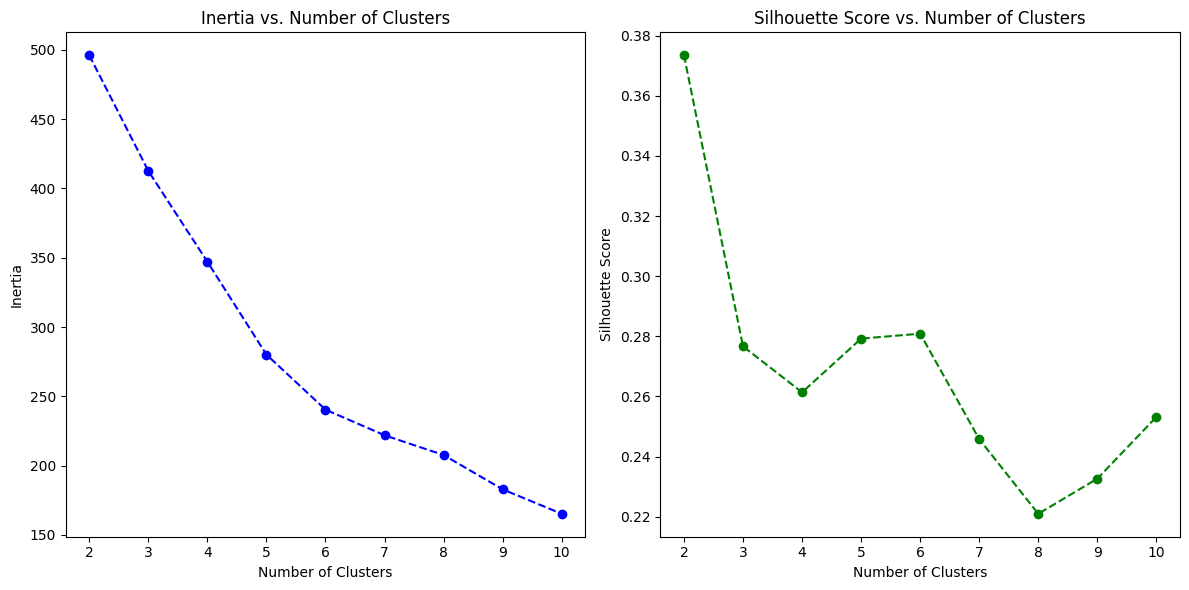

In [630]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(cluster_range, inertia, marker='o', color='b', linestyle='--')
plt.title('Inertia vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

plt.subplot(1, 2, 2)
plt.plot(cluster_range, silhouette_scores, marker='o', color='g', linestyle='--')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

Based on both line chart, Inertia vs Number of Clusters (left) and Silhouette Score vs Number of Clusters (right), we will choose the optimal cluster (k) is **6**.

In [631]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

center_metrics['Cluster'] = clusters

In [632]:
cluster_summary = center_metrics.groupby('Cluster').size()

print(f"Number of players in cluster 0: {cluster_summary[0]}")
print(f"Number of players in cluster 1: {cluster_summary[1]}")
print(f"Number of players in cluster 2: {cluster_summary[2]}")
print(f"Number of players in cluster 3: {cluster_summary[3]}")
print(f"Number of players in cluster 4: {cluster_summary[4]}")
# print(f"Number of players in cluster 5: {cluster_summary[5]}")

Number of players in cluster 0: 27
Number of players in cluster 1: 30
Number of players in cluster 2: 19
Number of players in cluster 3: 16
Number of players in cluster 4: 2


In [633]:
cluster_mean = center_metrics.groupby('Cluster').mean()

cluster_mean

,pts,fg%,2p%,efg%,orb,trb,blk,stl,tov
Cluster,,,,,,,,,
0,43.037037,0.588593,0.648370,1.002370,14.370370,38.037037,6.925926,4.814815,8.407407
1,214.066667,0.544967,0.597767,0.578433,49.666667,155.200000,24.166667,15.066667,27.766667
2,484.736842,0.574526,0.604632,0.603053,83.894737,293.526316,40.157895,27.315789,58.473684
3,57.000000,0.350500,0.473538,0.397500,10.625000,37.562500,5.625000,4.562500,8.000000
4,0.000000,0.553500,0.553500,11.000000,27.000000,13.500000,7.000000,6.000000,21.500000
